In [2]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
from scipy.stats import multivariate_normal
import random
from sklearn.svm import SVC
random.seed(189)
np.random.seed(189)

In [13]:
def plot_gaussian(mu, Sigma, title, x_range=(-5,5), y_range=(-5,5), num_levels=10):
    """
    Plots isocontours of a 2D Gaussian N(mu, Sigma).
    """
    x = np.linspace(x_range[0], x_range[1], 200)
    y = np.linspace(y_range[0], y_range[1], 200)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Create the multivariate normal object
    rv = multivariate_normal(mean=mu, cov=Sigma)
    Z = rv.pdf(pos)  # Evaluate the PDF on the grid

    plt.figure()
    cs = plt.contour(X, Y, Z, levels=num_levels)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")  # So that x/y scales match
    plt.colorbar(cs, label="PDF value")

In [14]:
def plot_pdf_difference(muA, SigmaA, muB, SigmaB,
                        title, x_range=(-5,5), y_range=(-5,5), num_levels=10):
    """
    Plots isocontours of the difference of two 2D Gaussian PDFs:
        f_A(x) - f_B(x).
    This is NOT itself a valid PDF, but we can still visualize its contours.
    """
    x = np.linspace(x_range[0], x_range[1], 200)
    y = np.linspace(y_range[0], y_range[1], 200)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    rvA = multivariate_normal(mean=muA, cov=SigmaA)
    rvB = multivariate_normal(mean=muB, cov=SigmaB)
    Z = rvA.pdf(pos) - rvB.pdf(pos)

    plt.figure()
    cs = plt.contour(X, Y, Z, levels=num_levels)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.colorbar(cs, label="f_A(x) - f_B(x)")

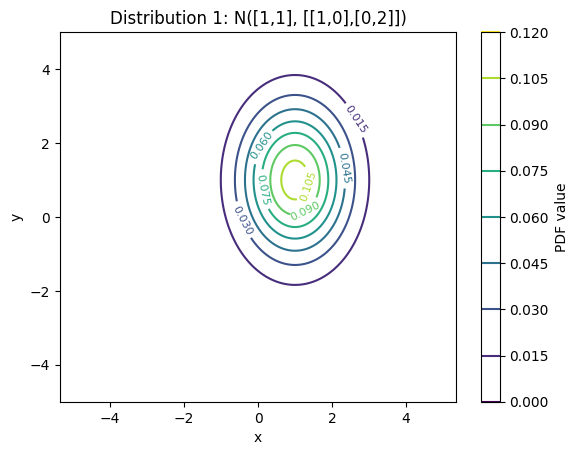

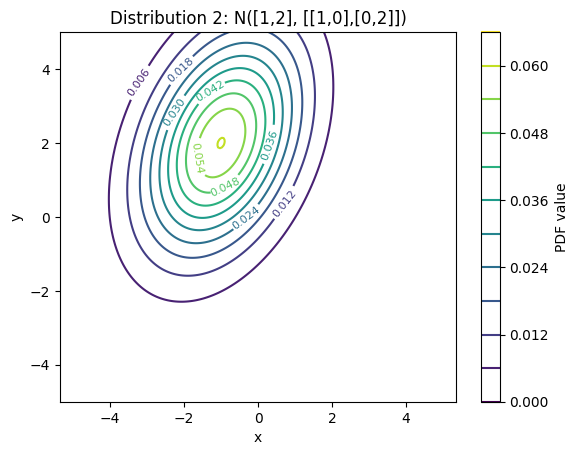

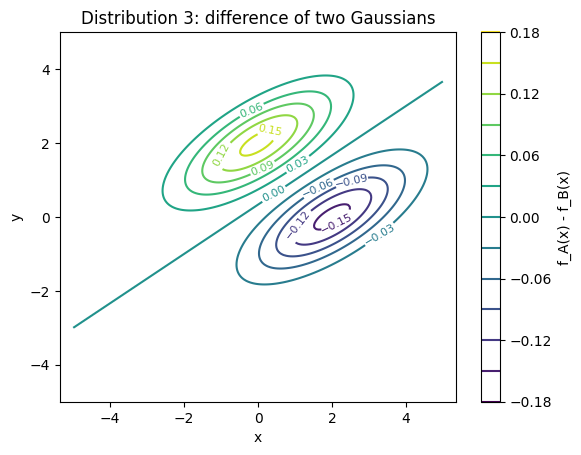

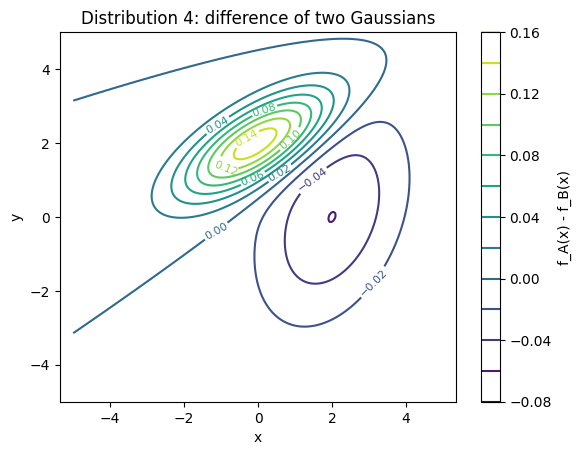

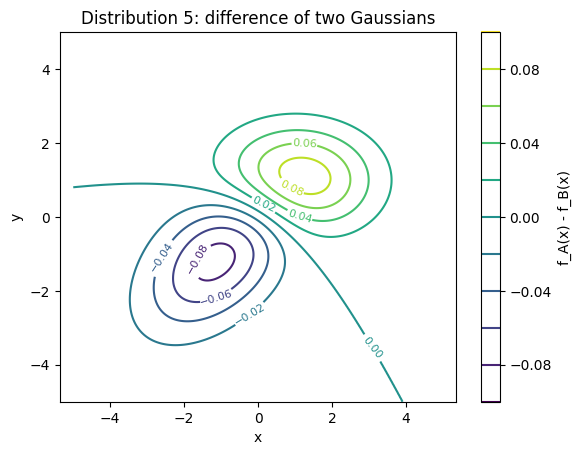

In [18]:
mu1 = np.array([1, 1])
Sigma1 = np.array([[1, 0], [0, 2]])
plot_gaussian(mu1, Sigma1, "Distribution 1: N([1,1], [[1,0],[0,2]])")

mu2 = np.array([-1, 2])
Sigma2 = np.array([[2, 1], [1, 4]])
plot_gaussian(mu2, Sigma2, "Distribution 2: N([1,2], [[1,0],[0,2]])")

mu3A = np.array([0, 2])
Sigma3A = np.array([[2, 1], [1, 1]])
mu3B = np.array([2, 0])
Sigma3B = np.array([[2, 1], [1, 1]])
plot_pdf_difference(mu3A, Sigma3A, mu3B, Sigma3B,"Distribution 3: difference of two Gaussians")

mu4A = np.array([0, 2])
Sigma4A = np.array([[2, 1], [1, 1]])
mu4B = np.array([2, 0])
Sigma4B = np.array([[2, 1], [1, 4]])
plot_pdf_difference(mu4A, Sigma4A, mu4B, Sigma4B,"Distribution 4: difference of two Gaussians")

mu5A = np.array([1, 1])
Sigma5A = np.array([[2, 0], [0, 1]])
mu5B = np.array([-1, -1])
Sigma5B = np.array([[2, 1], [1, 2]])
plot_pdf_difference(mu5A, Sigma5A, mu5B, Sigma5B,"Distribution 5: difference of two Gaussians")

In [19]:
from matplotlib.patches import Ellipse

n = 100
x1 = 3 + 3 * np.random.randn(n)
y  = 4 + 2 * np.random.randn(n)
x2 = 0.5*x1+y
data = np.column_stack((x1, x2))
sample_mean = np.mean(data, axis=0)
sample_cov  = np.cov(data, rowvar=False)
print("Sample mean:", sample_mean)
print("Sample covariance:\n", sample_cov)

Sample mean: [2.60072073 5.18763314]
Sample covariance:
 [[10.09851556  5.18872784]
 [ 5.18872784  6.10548567]]


Sample mean: [2.60072073 5.18763314]
Sample covariance:
 [[10.09851556  5.18872784]
 [ 5.18872784  6.10548567]]
Eigenvalues: [13.6615841   2.54241713]
Eigenvectors (columns):
 [[ 0.82435196 -0.56607759]
 [ 0.56607759  0.82435196]]


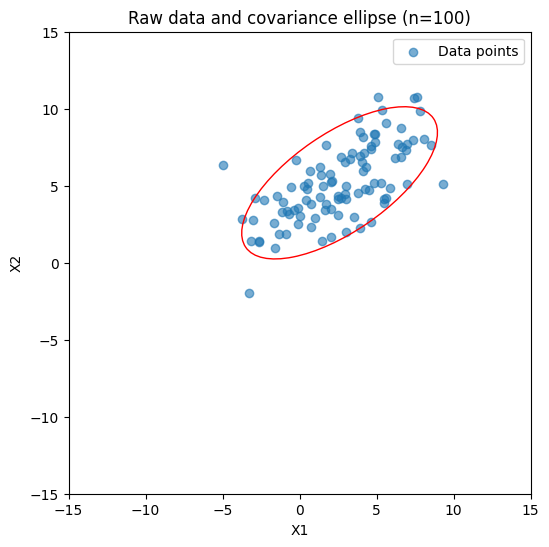

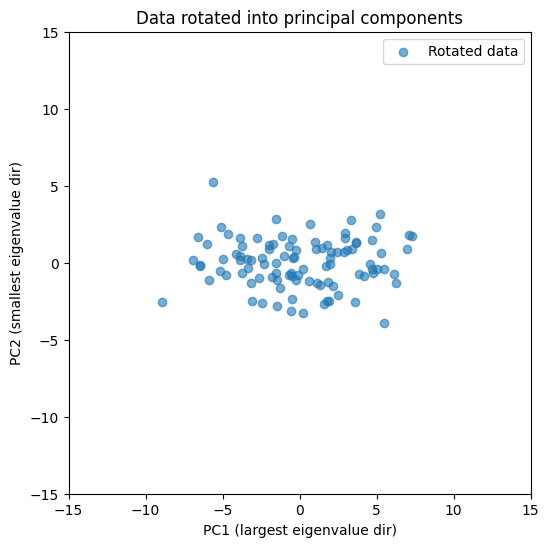

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# For reproducibility
import random
random.seed(189)
np.random.seed(189)

def main():
    n = 100

    # 1) Generate data
    #    X1 ~ N(3, 9) => mean=3, stdev=3
    X1 = 3 + 3 * np.random.randn(n)

    #    X2 = 0.5 * X1 + Y,  Y ~ N(4, 4) => mean=4, stdev=2
    Y  = 4 + 2 * np.random.randn(n)
    X2 = 0.5 * X1 + Y

    # Combine into a single (n x 2) array
    data = np.column_stack((X1, X2))

    # 2) Compute sample mean and sample covariance
    sample_mean = np.mean(data, axis=0)           # shape (2,)
    sample_cov  = np.cov(data, rowvar=False)      # shape (2,2)

    print("Sample mean:", sample_mean)
    print("Sample covariance:\n", sample_cov)

    # 3) Plot raw data
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(data[:,0], data[:,1], alpha=0.6, label="Data points")
    ax.set_xlim([-15, 15])
    ax.set_ylim([-15, 15])
    ax.set_aspect('equal', 'box')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title("Raw data and covariance ellipse (n=100)")

    # 4) Plot covariance ellipse
    #    We'll draw an ellipse at (sample_mean) with shape determined by sample_cov.
    plot_cov_ellipse(sample_mean, sample_cov, ax, edgecolor='red')
    ax.legend()

    # 5) Eigen-decomposition of the sample covariance
    eigvals, eigvecs = np.linalg.eig(sample_cov)
    # Sort by largest eigenvalue first
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    print("Eigenvalues:", eigvals)
    print("Eigenvectors (columns):\n", eigvecs)

    # 6) Rotate the data by U^T, where U is the matrix of eigenvectors
    #    so new coordinates = U^T * (x - mean).
    #    We'll subtract the mean first so that rotation is around the mean.
    data_centered = data - sample_mean
    U = eigvecs
    data_rotated = data_centered @ U  # shape (n, 2)

    # 7) Plot the rotated data
    fig2, ax2 = plt.subplots(figsize=(6,6))
    ax2.scatter(data_rotated[:,0], data_rotated[:,1], alpha=0.6, label="Rotated data")
    ax2.set_aspect('equal', 'box')
    ax2.set_xlim([-15, 15])
    ax2.set_ylim([-15, 15])
    ax2.set_xlabel("PC1 (largest eigenvalue dir)")
    ax2.set_ylabel("PC2 (smallest eigenvalue dir)")
    ax2.set_title("Data rotated into principal components")
    ax2.legend()

    plt.show()

def plot_cov_ellipse(mean, cov, ax, n_std=2.0, **kwargs):
    """
    Plot an ellipse representing the covariance matrix 'cov' centered at 'mean'.
    n_std: The radius of the ellipse in number of standard deviations.
    """
    # Eigen-decompose the covariance
    vals, vecs = np.linalg.eigh(cov)
    # Sort by largest eigenvalue
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Compute "angle" of ellipse in degrees
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height of ellipse (2*n_std times sqrt of eigenvalues)
    width, height = 2 * n_std * np.sqrt(vals)
    
    # Create the Ellipse patch
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, fill=False, **kwargs)
    ax.add_patch(ellipse)

if __name__ == "__main__":
    main()
